# Introduction to Deep Learning with PyTorch
----

Course link: https://app.datacamp.com/learn/courses/introduction-to-deep-learning-with-pytorch

### Installing necessary libraries

In [27]:
# %pip install torch numpy pandas matplotlib

In [28]:
# %run conda-env.py

![neural-network-overview](images/neural-network-overview.png)

![venn-diagram-ai-ml-deeplearning](images/venn-diagram-ai-ml-deeplearning.png)

# Torch code snippets

In [29]:
import torch

## Tensor Attributes

### 1. Tensor Shape

In [30]:
Lst = [[1, 2, 3], [4, 5, 6]]
tensor = torch.tensor(Lst)
tensor.shape

torch.Size([2, 3])

### 2. Tensor Data Type

In [31]:
tensor.dtype

torch.int64

### 3. Tensor Device

In [32]:
tensor.device

device(type='cpu')

## Creating our own Neural Network
----
![creating-neural-network-1](images/creating-neural-network-1.png)

In [33]:
import torch.nn as nn

In [34]:
# Create input_tensor with three features
input_tensor = torch.tensor(
    [[0.342, 0.543, -0.4533]]
)

A linear layer takes an input, applied a linear function, and returns output.

What happens in a linear layer is 'For input 'X', weights 'W0' and bias 'b0', the linear layer performs

y0 = W0*X + b0

In PyTorch: Output = W0 @ input + b0

So when we call the nn.linear function below, it calls the Weights and Biases randomly so they are not yet useful. But we tune them in models so the output is meaningful.

In [35]:
# Define our first linear layer. in_features is the number of input layers and out_features is the number of output layers. Look at the image under 'Creating our own Neural Network'.
linear_layer = nn.Linear(in_features=3, out_features=2)

In [36]:
# Pass input through linear layer
output = linear_layer(input_tensor)

output

tensor([[-0.5884,  0.2708]], grad_fn=<AddmmBackward0>)

### Getting to know the linear layer operation

- Each linear layer has a .weight and .bias
- Each linear layer multiples its respective input with layer weights and adds biases
- Even with multiple stacked linear layers, output still has linear relationship with input.

In [37]:
linear_layer.weight

Parameter containing:
tensor([[-0.5134, -0.3167,  0.4947],
        [-0.0271,  0.1013, -0.2174]], requires_grad=True)

In [38]:
linear_layer.bias

Parameter containing:
tensor([-0.0166,  0.1265], requires_grad=True)

### Lets visualize the Linear_layers with their weights and biases

/var/folders/ns/jv7pb5cs01nc0m_8788fhd680000gn/T/ipykernel_3176/4206505998.py:41: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


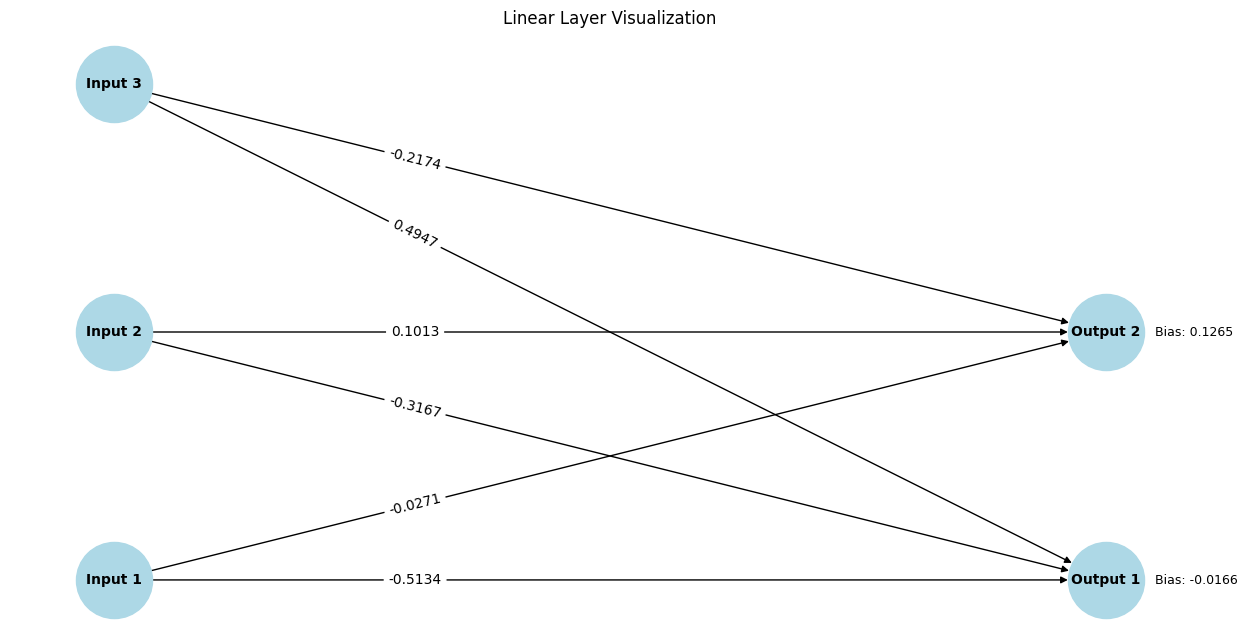

Output tensor:
tensor([[-0.5884,  0.2708]], grad_fn=<AddmmBackward0>)


In [39]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_linear_layer(linear_layer, input_tensor, output_tensor):
    # Create a directed graph
    G = nx.DiGraph()

    # Add input nodes
    for i in range(input_tensor.shape[1]):
        G.add_node(f"Input {i+1}", pos=(0, i))

    # Add output nodes
    for i in range(output_tensor.shape[1]):
        G.add_node(f"Output {i+1}", pos=(2, i))

    # Add edges with weights
    for i in range(input_tensor.shape[1]):
        for j in range(output_tensor.shape[1]):
            weight = linear_layer.weight[j, i].item()
            G.add_edge(f"Input {i+1}", f"Output {j+1}", weight=round(weight, 4))

    # Set up the plot
    plt.figure(figsize=(12, 6))
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=3000, font_size=10, font_weight='bold')

    # Add edge labels (weights) with adjusted positions
    edge_labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

    # Add bias labels
    for i, bias in enumerate(linear_layer.bias):
        plt.text(2.1, i, f'Bias: {bias.item():.4f}', 
                 fontsize=9, verticalalignment='center')

    plt.title("Linear Layer Visualization")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Visualize the linear layer
visualize_linear_layer(linear_layer, input_tensor, output)

# Print the output tensor
print("Output tensor:")
print(output)

Networks with only linear layers are called **fully connected layers**. Each neuron in one layer is connected to each neuron in the next layer.

# Each **nn.Linear** line of code is a Linear Layer

Here is a visual

![neural-network-linear-layers](images/neural-network-linear-layers.png)

## Stacking layers with nn.Sequential()
- A PyTorch container that allows us to stack multiple neural network modules in sequence.

In [40]:
# Create network with three linear layers
model = nn.Sequential(
    nn.Linear (10, 18),
    nn.Linear (18, 20),
    nn.Linear (20, 5)
)
model

Sequential(
  (0): Linear(in_features=10, out_features=18, bias=True)
  (1): Linear(in_features=18, out_features=20, bias=True)
  (2): Linear(in_features=20, out_features=5, bias=True)
)

In [41]:
# Create input_tensor with ten features
input_tensor_2 = torch.tensor(
    [[0.342, 0.543, -0.4533, 0.434, -0.3435, 0.3523, -0.3424, 0.3453, 0.87509, -0.3425]]
)

print('This is a 1x10 dimentions tensor', input_tensor_2)

This is a 1x10 dimentions tensor tensor([[ 0.3420,  0.5430, -0.4533,  0.4340, -0.3435,  0.3523, -0.3424,  0.3453,
          0.8751, -0.3425]])


In [42]:
output_tensor = model(input_tensor_2)
print('here we received an output of 1x5 dimensions', output_tensor)

here we received an output of 1x5 dimensions tensor([[ 0.0419,  0.1981, -0.0241, -0.1623,  0.0158]],
       grad_fn=<AddmmBackward0>)


## Exercise #1

### Your first neural network
In this exercise, you will implement a small neural network containing two linear layers. The first layer takes an eight-dimensional input, and the last layer outputs a one-dimensional tensor.

The torch package and the torch.nn package have already been imported for you.

Create a neural network of two linear layers that takes a tensor of dimensions 1x8 as input, representing 8 features, and outputs a tensor of dimensions 1x1
Use any output dimension for the first layer you want.

In [43]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1]])

# Implement a small neural network with exactly two linear layers
model = nn.Sequential(
    nn.Linear(8, 4),  # First linear layer with an intermediate output dimension
    nn.Linear(4, 1)   # Second linear layer to produce the final output
)

output = model(input_tensor)
print(output)

tensor([[-0.3265]], grad_fn=<AddmmBackward0>)


### Stacking linear layers
Nice work building your first network with two linear layers. Let's stack some more layers. Remember that a neural network can have as many hidden layers as we want, provided the inputs and outputs line up.

The aim of this exercise is for you to become comfortable thinking about the inputs and outputs of each successive layer in a PyTorch neural network.

This network is designed to ingest the following input:

`
input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1, 5, 3, 6, 9]])
`

- Instructions: Reorder the items provided to create a neural network with three hidden layers and an output of size 2.

In [44]:
# Explanation for the code below:
# 1. It takes an input tensor with 12 elements, as specified in the question.
# 2. It has three hidden layers:
#    - The first layer transforms from 12 to 20 dimensions
#    - The second layer transforms from 20 to 14 dimensions
#    - The third layer transforms from 14 to 3 dimensions
# 3. The final layer outputs a tensor of size 2, as required.

# The nn.Sequential module is used to stack these layers in order. Each nn.Linear layer performs a linear transformation on its input.
# The dimensions of each layer are chosen arbitrarily, but ensure that the output of one layer matches the input of the next.
# This structure allows the network to learn increasingly complex representations of the input data as it passes through each layer.

input_tensor = torch.Tensor([[2, 3, 6, 7, 9, 3, 2, 1, 5, 3, 6, 9]])

model = nn.Sequential(
    nn.Linear(12, 20),  # First hidden layer
    nn.Linear(20, 14),   # Second hidden layer
    nn.Linear(14, 3),    # Third hidden layer
    nn.Linear(3, 2)     # Fourth the output layer
)

output = model(input_tensor)
print(output)

tensor([[ 1.4087, -2.3059]], grad_fn=<AddmmBackward0>)


## There are multiple types of Layers

1. Linear (Fully Connected) Layers
2. Convolutional Layers
3. Recurrent Layers (LSTM, GRU, Simple RNN)
4. Pooling Layers (Max, Average, Global)
5. Normalization Layers (Batch, Layer, Instance)
6. Activation Layers (ReLU, Sigmoid, Tanh, Softmax)
7. Dropout Layers
8. Flatten Layers
9. Embedding Layers
10. Attention Layers
11. Transformer Layers
12. Residual Connections

# Activation Functions
**Activation Functions** add **non-linearity** to the network

### Why do we need activation functions?
Imagine a neural network as a big house with many rooms, and each neuron is like a light bulb in those rooms. Now, activation functions are like light switches for these bulbs.
Without switches (activation functions), the lights would always be on or off at the same brightness. This is boring and not very useful!
With switches (activation functions), we can control which lights are on, how bright they are, or even have dimmer switches for more control.
This control allows our neural network "house" to create complex lighting patterns, just like how real neural networks can learn complex patterns in data.

![Activation-layers](images/activation-layers.png)

### Sigmoid function example with an Activation layer

- We use Sigmoid for binary classification.
- Sigmoid is used as the last step in network of linear layers is **equivalent** to tradtional logistic regression.

![sigmoid-function-example](images/sigmoid-function-example.png)

In [45]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([6])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)
output

tensor([0.9975])

In [46]:
model = nn.Sequential(
    nn.Linear(6, 4), # First Linear Layer
    nn.Linear(4, 1), # Second Linear Layer
    nn.Sigmoid() # Sigmoid Activation Function
)
model

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
  (2): Sigmoid()
)

### Softmax as an Activation Layer

![softmax-activation-function](images/softmax-activation-function.png)

In [47]:
import torch
import torch.nn as nn

# Creating an input tensor
input_tensor = torch.tensor([[4.3, 6.1, 2.3]]) # 1. The outer brackets [ ] create a list, which represents a batch of inputs. The inner brackets [ ] represent a single sample within that batch. This structure creates a 2-dimensional tensor with the shape (1, 3), where: 1 is the batch size (number of samples) 3 is the number of features for each sample

# Apply softmax along the last dimension
probabilities = nn.Softmax(dim=1)
output_tensor = probabilities(input_tensor)

output_tensor

tensor([[0.1392, 0.8420, 0.0188]])

# Exercise 1.6

## The sigmoid and softmax functions
The sigmoid and softmax functions are two of the most popular activation functions in deep learning. They are both usually used as the last step of a neural network. Sigmoid functions are used for binary classification problems, whereas softmax functions are often used for multi-class classification problems. This exercise will familiarize you with creating and using both functions.

Let's say that you have a neural network that returned the values contained in the **score** tensor as a pre-activation output. You will apply activation functions to this output.

### Instructions 1/2

Create a sigmoid function and apply it on input_tensor to generate a probability.

In [48]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[0.8]])

# Create a sigmoid function and apply it on input_tensor
sigmoid = nn.Sigmoid()
probability = sigmoid(input_tensor)
print(probability)

tensor([[0.6900]])


### Instruction 2/2

Create a softmax function and apply it on input_tensor to generate a probability.

In [49]:
import torch
import torch.nn as nn

input_tensor = torch.tensor([[1.0, -6.0, 2.5, -0.3, 1.2, 0.8]])

# Create a sigmoid function and apply it on input_tensor
softmax = nn.Softmax(dim=-1)
probabilities = softmax(input_tensor)
print(probabilities)

tensor([[1.2828e-01, 1.1698e-04, 5.7492e-01, 3.4961e-02, 1.5669e-01, 1.0503e-01]])


# Forward and Backward Pass OR Forward and Backward Propogation
---

### What is a Forward Pass?
A forward pass is like sending a message through a game of telephone, but with math. Imagine you and your friends are playing a game where you pass a message from one person to another, but each person changes the message a little bit based on some rules.
In a neural network, the forward pass is the process of taking an input (like an image or a number) and passing it through all the layers of the network to get an output (like a prediction or classification).

### Why is it Used and Important?
The forward pass is used to make predictions or classifications. It's important because:
It's how the network "thinks": Just like how your brain processes information to make decisions, the forward pass is how a neural network processes data to make predictions.
It's the first step in learning: Before a network can learn, it needs to make a guess. The forward pass is that guess.
It helps us understand what the network is doing: By following the forward pass, we can see how the network arrives at its conclusion.

### An Analogy for Forward Pass
Think of a forward pass like baking a cake:
You start with ingredients (input data).
You mix them in bowls (hidden layers) using recipes (weights and biases).
You apply heat or cold (activation functions) at various stages.
Finally, you get a cake (output) which might be great or might need improvement.
The forward pass is just the baking process.

### What is Back Propagation?
Backpropagation is like playing a game of "Hot and Cold" with your neural network. Remember when you were a kid, and someone would hide an object, and you'd try to find it? They'd say "warmer" when you got closer and "colder" when you moved away. Backpropagation is similar, but instead of finding a hidden object, we're trying to find the best weights and biases for our neural network.

### Why is it Used and Important?
Backpropagation is the learning process of neural networks. It's important because:
It teaches the network: Just like how you learn from your mistakes, backpropagation helps the network learn from its errors.
It improves predictions: By adjusting weights and biases, the network gets better at making accurate predictions.
It's efficient: Backpropagation is a smart way to calculate how each weight and bias affects the final error.

### An Analogy for Back Propogation
- You bake a cake (forward pass) and submit it to judges.
- The judges taste it and give you a score (calculate error).
- You then think back through your baking process (backpropagation):
- Was it too sweet? Maybe use less sugar next time.
- Too dry? Perhaps adjust the baking time.
- Not chocolatey enough? Increase the cocoa powder.
- You make these small adjustments to your recipe (update weights and biases).
- You bake again, hoping for a better cake (and a better score) next time.

## Binary Classification: Forward Propogation

In [50]:
## Create input data of shape 5x6
input_data = torch.tensor([
    [ 0.4823, -0.2314,  0.7651, -0.5982,  0.1245,  0.8976],
    [-0.7634,  0.3217, -0.9012,  0.5678, -0.1543,  0.6789],
    [ 0.2345, -0.8765,  0.4321, -0.6543,  0.9876, -0.3210],
    [-0.1111,  0.2222, -0.3333,  0.4444, -0.5555,  0.6666],
    [ 0.7890, -0.4567,  0.1234, -0.9876,  0.5432, -0.2109]
])

# create a binary classification model
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)

print(model)
print(output)

Sequential(
  (0): Linear(in_features=6, out_features=4, bias=True)
  (1): Linear(in_features=4, out_features=1, bias=True)
  (2): Sigmoid()
)
tensor([[0.3831],
        [0.4491],
        [0.4073],
        [0.4218],
        [0.4055]], grad_fn=<SigmoidBackward0>)


## Multi-class classification: forward pass

In [51]:
## Create input data of shape 5x6
input_data = torch.tensor([
    [ 0.4823, -0.2314,  0.7651, -0.5982,  0.1245,  0.8976],
    [-0.7634,  0.3217, -0.9012,  0.5678, -0.1543,  0.6789],
    [ 0.2345, -0.8765,  0.4321, -0.6543,  0.9876, -0.3210],
    [-0.1111,  0.2222, -0.3333,  0.4444, -0.5555,  0.6666],
    [ 0.7890, -0.4567,  0.1234, -0.9876,  0.5432, -0.2109]
])

# Specify model has three classes
n_classes = 3

# Create multiclass classification model
model = nn.Sequential(
    nn.Linear(6, 4), # First linear layer 
    nn.Linear(4, n_classes), # Second linear Layer 
    nn.Softmax(dim=-1) # Softmax activation
)

# Pass input data through model
output = model (input_data)
print(output.shape)

print('Each row here sums up to 1:', output)
print('Sum of each row:', output.sum(dim=1))
print('Each row is a unique feature called a class like Row 1 = class 1 (mammal), row 2 = class 1 (mammal), row 3 = class 3 (reptile)')

torch.Size([5, 3])
Each row here sums up to 1: tensor([[0.2839, 0.4905, 0.2256],
        [0.2082, 0.5371, 0.2547],
        [0.3156, 0.4639, 0.2205],
        [0.2401, 0.5268, 0.2330],
        [0.3112, 0.4744, 0.2145]], grad_fn=<SoftmaxBackward0>)
Sum of each row: tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000], grad_fn=<SumBackward1>)
Each row is a unique feature called a class like Row 1 = class 1 (mammal), row 2 = class 1 (mammal), row 3 = class 3 (reptile)


## Regression: Forward Propogation
Below the code does not have an activation function, and the last layer's last dimension returns an output with one feature.

In [52]:
## Create input data of shape 5x6
input_data = torch.tensor([
    [ 0.4823, -0.2314,  0.7651, -0.5982,  0.1245,  0.8976],
    [-0.7634,  0.3217, -0.9012,  0.5678, -0.1543,  0.6789],
    [ 0.2345, -0.8765,  0.4321, -0.6543,  0.9876, -0.3210],
    [-0.1111,  0.2222, -0.3333,  0.4444, -0.5555,  0.6666],
    [ 0.7890, -0.4567,  0.1234, -0.9876,  0.5432, -0.2109]
])

# Create regression model
model = nn.Sequential(
    nn.Linear(6, 4), # First linear layer 
    nn.Linear(4, 1) # Second linear layer
)

# Pass input data through model
output = model(input_data)

# Return output
print(output)

tensor([[0.0950],
        [0.5361],
        [0.0685],
        [0.4833],
        [0.1317]], grad_fn=<AddmmBackward0>)


## Exercise 2.1

### Building a binary classifier in PyTorch
Recall that a small neural network with a single linear layer followed by a sigmoid function is a binary classifier. It acts just like a logistic regression.

In this exercise, you'll practice building this small network and interpreting the output of the classifier.

The torch package and the torch.nn package have already been imported for you.

Instruction-

- Create a neural network that takes a tensor of dimensions 1x8 as input, and returns an output of the correct shape for binary classification.
- Pass the output of the linear layer to a sigmoid, which both takes in and return a single float.

In [59]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 2, 3, 6, 8, 9]])

# Implement a small neural network for binary classification
model = nn.Sequential(
  nn.Linear(8, 1),
  nn.Sigmoid()
)

output = model(input_tensor)
print(output)

tensor([[0.9405]], grad_fn=<SigmoidBackward0>)


## Exercise 2.2

### From regression to multi-class classification
Recall that the models we have seen for binary classification, multi-class classification and regression have all been similar, barring a few tweaks to the model.

In this exercise, you'll start by building a model for regression, and then tweak the model to perform a multi-class classification.

### Instructions 1/2
Create a neural network with exactly four linear layers, which takes the input tensor as input, and outputs a regression value, using any shapes you like for the hidden layers.

In [54]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

# Implement a neural network with exactly four linear layers
model = nn.Sequential(
    nn.Linear(11, 4),
    nn.Linear(4, 5),
    nn.Linear(5, 9),
    nn.Linear(9, 1)
)

output = model(input_tensor)
print(output)

tensor([[0.2656]], grad_fn=<AddmmBackward0>)


Explanation for the code above-

Why do we need '1' at the end of the last linear layer?
![Exercise2.2-instruction1](images/Exercise2.2-instruction1.png)


Here's why we use 1 as the output in the last layer?

***Purpose of Regression***: In regression, we're trying to predict a single continuous value. Think of it like predicting the price of a house or the temperature tomorrow.
Single Output: The last layer outputs just one number because that's all we need for regression. It's like having a single thermometer to measure temperature.
No Activation Function: Notice there's no activation function after the last layer. In regression, we often want the raw output value, which can be any real number.

### Instructions 2/2
A similar neural network to the one you just built is provided, containing four linear layers; update this network to perform a multi-class classification with four outputs.

In [58]:
import torch
import torch.nn as nn

input_tensor = torch.Tensor([[3, 4, 6, 7, 10, 12, 2, 3, 6, 8, 9]])

# Implement a neural network with exactly four linear layers
model = nn.Sequential(
    nn.Linear(11, 4),
    nn.Linear(4, 5),
    nn.Linear(5, 9),
    nn.Linear(9, 1),
    nn.Softmax(dim=-1)
)

output = model(input_tensor)
print(output)

tensor([[0.3458, 0.2022, 0.0830, 0.3690]], grad_fn=<SoftmaxBackward0>)


### Explanation for the code above

For the second part, we're adapting the model for multi-class classification. 

Here's why we change the last layer to output 4 values and add a Softmax:
![Exercise2.2-instruction2](images/Exercise2.2-instruction2.png)

1. **Purpose of Classification**: In multi-class classification, we're trying to categorize input into one of several classes. Imagine sorting fruits into apples, oranges, bananas, and pears.

2. **Multiple Outputs**: The last layer now outputs 4 numbers because we have 4 possible classes. It's like having 4 baskets, one for each type of fruit.

3. **Softmax Activation**: We add a Softmax layer at the end. This turns the 4 numbers into probabilities that sum to 1. It's like saying, "There's a 70% chance this is an apple, 20% orange, 5% banana, and 5% pear."

4. **Why 4 Outputs**: The number of outputs in the last layer should match the number of classes in your problem. If you're classifying among 4 types of fruit, you need 4 outputs.